In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Carico i dati

In [2]:
df = pd.read_csv("Train_newColumns.csv", 
                 skipinitialspace=True, sep=',', nrows=2000)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsWithCurrManager,Stagnation
0,37,0,Travel_Rarely,Research & Development,4,3,Medical,4,1,3,...,0,12,4,0,10,3,2,5,3,4
1,36,0,Travel_Rarely,Research & Development,5,3,Technical Degree,3,0,2,...,1,13,4,1,18,2,3,4,4,0
2,36,1,Travel_Rarely,Research & Development,11,2,Medical,1,0,1,...,0,15,1,0,15,2,1,6,0,0
3,24,0,Travel_Rarely,Research & Development,11,2,Medical,3,0,3,...,1,12,4,0,6,3,2,6,1,0
4,58,0,Travel_Rarely,Research & Development,1,4,Medical,1,1,2,...,0,20,3,0,23,3,2,6,6,36


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1013 non-null   int64 
 1   Attrition                 1013 non-null   int64 
 2   BusinessTravel            1013 non-null   object
 3   Department                1013 non-null   object
 4   DistanceFromHome          1013 non-null   int64 
 5   Education                 1013 non-null   int64 
 6   EducationField            1013 non-null   object
 7   EnvironmentSatisfaction   1013 non-null   int64 
 8   Gender                    1013 non-null   int64 
 9   JobInvolvement            1013 non-null   int64 
 10  JobRole                   1013 non-null   object
 11  JobSatisfaction           1013 non-null   int64 
 12  MaritalStatus             1013 non-null   object
 13  MonthlyIncome             1013 non-null   int64 
 14  NumCompaniesWorked      

Ragioniamo sugli attributi

In [4]:
set(df['Age'])

{18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58}

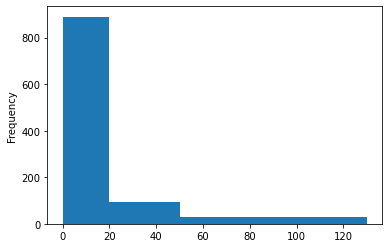

In [5]:
df['Stagnation'].plot(kind='hist', bins=[0, 20, 50, 130])
plt.show()

# Pre-processing

In [6]:
df['AgeBin'] = pd.cut(df['Age'].astype(int), 4, right=False)
df['AgeBin'] = df['AgeBin'].astype(str) + '_Age'

df['AgeBin']

0        [28.0, 38.0)_Age
1        [28.0, 38.0)_Age
2        [28.0, 38.0)_Age
3        [18.0, 28.0)_Age
4       [48.0, 58.04)_Age
              ...        
1008     [28.0, 38.0)_Age
1009     [28.0, 38.0)_Age
1010     [38.0, 48.0)_Age
1011     [28.0, 38.0)_Age
1012     [38.0, 48.0)_Age
Name: AgeBin, Length: 1013, dtype: object

In [7]:
i = 0
df['AttritionCat'] = df['Attrition'].astype(str)
for record in df['AttritionCat']:
    if df.at[i, 'Attrition'] == 0:
        df.at[i, 'AttritionCat'] = 'No_Attr'
    elif df.at[i,'Attrition'] == 1:
        df.at[i,'AttritionCat'] = 'Yes_Attr'
    i += 1
    
df['AttritionCat']

0        No_Attr
1        No_Attr
2       Yes_Attr
3        No_Attr
4        No_Attr
          ...   
1008     No_Attr
1009    Yes_Attr
1010    Yes_Attr
1011    Yes_Attr
1012    Yes_Attr
Name: AttritionCat, Length: 1013, dtype: object

In [8]:
i = 0
df['DistanceFromHomeBin'] = df['DistanceFromHome'].astype(str)
for record in df['DistanceFromHomeBin']:
    if df.at[i, 'DistanceFromHome'] < 10:
        df.at[i, 'DistanceFromHomeBin'] = 'near_Dist'
    elif df.at[i,'DistanceFromHome'] < 20 and df.at[i,'DistanceFromHome'] >= 10 :
        df.at[i,'DistanceFromHomeBin'] = 'medium_Dist'
    elif df.at[i,'DistanceFromHome'] >= 20:
        df.at[i,'DistanceFromHomeBin'] = 'far_Dist'
    i += 1
    
df['DistanceFromHomeBin']

0         near_Dist
1         near_Dist
2       medium_Dist
3       medium_Dist
4         near_Dist
           ...     
1008      near_Dist
1009      near_Dist
1010      near_Dist
1011      near_Dist
1012    medium_Dist
Name: DistanceFromHomeBin, Length: 1013, dtype: object

In [9]:
df['EducationCat'] = df['Education'].map(
    {1: 'Below College', 2: 'College', 3: 'Bachelor', 4:'Master', 5:'Doctor'}).astype(str)

df['EducationCat']

0            Bachelor
1            Bachelor
2             College
3             College
4              Master
            ...      
1008    Below College
1009         Bachelor
1010         Bachelor
1011    Below College
1012         Bachelor
Name: EducationCat, Length: 1013, dtype: object

In [10]:
df['EnvironmentSatisfactionCat'] = df['EnvironmentSatisfaction'].map(
    {1: 'Low_Sat', 2: 'Medium_Sat', 3: 'High_Sat', 4:'Very High_Sat'}).astype(str)

df['EnvironmentSatisfactionCat']

0       Very High_Sat
1            High_Sat
2             Low_Sat
3            High_Sat
4             Low_Sat
            ...      
1008         High_Sat
1009    Very High_Sat
1010         High_Sat
1011       Medium_Sat
1012         High_Sat
Name: EnvironmentSatisfactionCat, Length: 1013, dtype: object

In [11]:
df['GenderCat'] = df['Gender'].map(
    {0: 'Male', 1: 'Female'}).astype(str)

df['GenderCat']

0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
1008      Male
1009      Male
1010      Male
1011    Female
1012    Female
Name: GenderCat, Length: 1013, dtype: object

In [12]:
df['JobInvolvementCat'] = df['JobInvolvement'].map(
    {1: 'Low_JobInv', 2: 'Medium_JobInv', 3: 'High_JobInv', 4:'Very High_JobInv'}).astype(str)

df['JobInvolvementCat']

0            High_JobInv
1          Medium_JobInv
2             Low_JobInv
3            High_JobInv
4          Medium_JobInv
              ...       
1008         High_JobInv
1009         High_JobInv
1010       Medium_JobInv
1011         High_JobInv
1012    Very High_JobInv
Name: JobInvolvementCat, Length: 1013, dtype: object

In [13]:
df['JobSatisfactionCat'] = df['JobSatisfaction'].map(
    {1: 'Low_JobSat', 2: 'Medium_JobSat', 3: 'High_JobSat', 4:'Very High_JobSat'}).astype(str)

df['JobSatisfactionCat']

0          Medium_JobSat
1          Medium_JobSat
2          Medium_JobSat
3             Low_JobSat
4             Low_JobSat
              ...       
1008       Medium_JobSat
1009         High_JobSat
1010    Very High_JobSat
1011       Medium_JobSat
1012       Medium_JobSat
Name: JobSatisfactionCat, Length: 1013, dtype: object

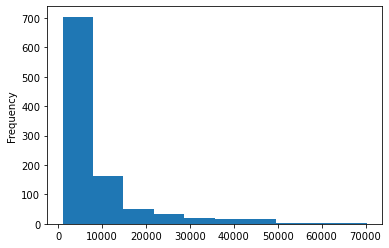

In [14]:
df['MonthlyIncome'].plot(kind='hist')
plt.show()

In [15]:
i = 0
df['MonthlyIncomeBin'] = df['MonthlyIncome'].astype(str)
for record in df['MonthlyIncomeBin']:
    if df.at[i, 'MonthlyIncome'] < 10000:
        df.at[i, 'MonthlyIncomeBin'] = 'low_Inc'
    elif df.at[i,'MonthlyIncome'] < 30000 and df.at[i,'MonthlyIncome'] >= 10000 :
        df.at[i,'MonthlyIncomeBin'] = 'medium_Inc'
    elif df.at[i,'MonthlyIncome'] >= 30000:
        df.at[i,'MonthlyIncomeBin'] = 'high_Inc'
    i += 1
    
df['MonthlyIncomeBin']

0          low_Inc
1          low_Inc
2          low_Inc
3          low_Inc
4       medium_Inc
           ...    
1008       low_Inc
1009       low_Inc
1010       low_Inc
1011       low_Inc
1012       low_Inc
Name: MonthlyIncomeBin, Length: 1013, dtype: object

In [16]:
i = 0
df['NumCompaniesWorkedBin'] = df['NumCompaniesWorked'].astype(str)
for record in df['NumCompaniesWorkedBin']:
    if df.at[i, 'NumCompaniesWorked'] == 0:
        df.at[i, 'NumCompaniesWorkedBin'] = 'none_Comp'
    elif df.at[i,'NumCompaniesWorked'] <= 4 and df.at[i,'NumCompaniesWorked'] >= 1:
        df.at[i,'NumCompaniesWorkedBin'] = 'some_Comp'
    elif df.at[i,'NumCompaniesWorked'] >= 5:
        df.at[i,'NumCompaniesWorkedBin'] = 'many_Comp'
    i += 1
    
df['NumCompaniesWorkedBin']

0       many_Comp
1       some_Comp
2       many_Comp
3       some_Comp
4       some_Comp
          ...    
1008    none_Comp
1009    none_Comp
1010    none_Comp
1011    some_Comp
1012    none_Comp
Name: NumCompaniesWorkedBin, Length: 1013, dtype: object

In [17]:
df['OverTimeCat'] = df['OverTime'].map(
    {0: 'No_OT', 1: 'Yes_OT'}).astype(str)

df['OverTimeCat']

0        No_OT
1       Yes_OT
2        No_OT
3       Yes_OT
4        No_OT
         ...  
1008     No_OT
1009    Yes_OT
1010     No_OT
1011     No_OT
1012     No_OT
Name: OverTimeCat, Length: 1013, dtype: object

In [18]:
set(df['PercentSalaryHike'])

{11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25}

In [19]:
df['PercentSalaryHike'].median()

14.0

In [20]:
i = 0
df['PercentSalaryHikeBin'] = df['PercentSalaryHike'].astype(str)
for record in df['PercentSalaryHikeBin']:
    if df.at[i, 'PercentSalaryHike'] <= 14:
        df.at[i, 'PercentSalaryHikeBin'] = 'low_PSH'
    elif df.at[i,'PercentSalaryHike'] >= 15:
        df.at[i,'PercentSalaryHikeBin'] = 'high_PSH'
    i += 1
    
df['PercentSalaryHikeBin']

0        low_PSH
1        low_PSH
2       high_PSH
3        low_PSH
4       high_PSH
          ...   
1008    high_PSH
1009     low_PSH
1010     low_PSH
1011     low_PSH
1012    high_PSH
Name: PercentSalaryHikeBin, Length: 1013, dtype: object

In [21]:
df['RelationshipSatisfactionCat'] = df['RelationshipSatisfaction'].map(
    {1: 'Low_RelSat', 2: 'Medium_RelSat', 3: 'High_RelSat', 4:'Very High_RelSat'}).astype(str)

df['RelationshipSatisfactionCat']

0       Very High_RelSat
1       Very High_RelSat
2             Low_RelSat
3       Very High_RelSat
4            High_RelSat
              ...       
1008          Low_RelSat
1009       Medium_RelSat
1010         High_RelSat
1011       Medium_RelSat
1012    Very High_RelSat
Name: RelationshipSatisfactionCat, Length: 1013, dtype: object

In [22]:
set(df['StockOptionLevel'])

{0, 1, 2, 3}

In [23]:
df['StockOptionLevelCat'] = df['StockOptionLevel'].map(
    {0: '0_StockLevel', 1: '1_StockLevelRelSat', 2: '2_StockLevelRelSat', 3:'3_StockLevelRelSat'}).astype(str)

df['StockOptionLevelCat']

0             0_StockLevel
1       1_StockLevelRelSat
2             0_StockLevel
3             0_StockLevel
4             0_StockLevel
               ...        
1008    1_StockLevelRelSat
1009          0_StockLevel
1010          0_StockLevel
1011          0_StockLevel
1012          0_StockLevel
Name: StockOptionLevelCat, Length: 1013, dtype: object

In [24]:
i = 0
df['TotalWorkingYearsBin'] = df['TotalWorkingYears'].astype(str)
for record in df['TotalWorkingYearsBin']:
    if df.at[i, 'TotalWorkingYears'] < 10:
        df.at[i, 'TotalWorkingYearsBin'] = 'less 10 years_TWY'
    elif df.at[i,'TotalWorkingYears'] >= 10 and df.at[i,'TotalWorkingYears'] <20:
        df.at[i,'TotalWorkingYearsBin'] = '10-20 years_TWY'
    elif df.at[i,'TotalWorkingYears'] >= 20:
        df.at[i,'TotalWorkingYearsBin'] = 'more 20 years_TWY'
    i += 1
    
df['TotalWorkingYearsBin']

0         10-20 years_TWY
1         10-20 years_TWY
2         10-20 years_TWY
3       less 10 years_TWY
4       more 20 years_TWY
              ...        
1008    less 10 years_TWY
1009    less 10 years_TWY
1010    less 10 years_TWY
1011    less 10 years_TWY
1012    less 10 years_TWY
Name: TotalWorkingYearsBin, Length: 1013, dtype: object

In [25]:
set(df['TrainingTimesLastYear'])

{0, 1, 2, 3, 4, 5, 6}

In [26]:
i = 0
df['TrainingTimesLastYearBin'] = df['TrainingTimesLastYear'].astype(str)
for record in df['TrainingTimesLastYearBin']:
    if df.at[i, 'TrainingTimesLastYear'] == 0:
        df.at[i, 'TrainingTimesLastYearBin'] = 'no_TrainTimesLY'
    elif df.at[i,'TrainingTimesLastYear'] > 0 and df.at[i,'TrainingTimesLastYear'] < 7:
        df.at[i,'TrainingTimesLastYearBin'] = 'yes_TrainTimesLY'
    i += 1
    
df['TrainingTimesLastYearBin']

0       yes_TrainTimesLY
1       yes_TrainTimesLY
2       yes_TrainTimesLY
3       yes_TrainTimesLY
4       yes_TrainTimesLY
              ...       
1008    yes_TrainTimesLY
1009    yes_TrainTimesLY
1010    yes_TrainTimesLY
1011    yes_TrainTimesLY
1012    yes_TrainTimesLY
Name: TrainingTimesLastYearBin, Length: 1013, dtype: object

In [27]:
set(df['WorkLifeBalance'])

{1, 2, 3, 4}

In [28]:
df['WorkLifeBalanceCat'] = df['WorkLifeBalance'].map(
    {1: 'Bad_WorkLifeBal', 2: 'Good_WorkLifeBal', 3: 'Better_WorkLifeBal', 4:'Best_WorkLifeBal'}).astype(str)

df['WorkLifeBalanceCat']

0         Good_WorkLifeBal
1       Better_WorkLifeBal
2          Bad_WorkLifeBal
3         Good_WorkLifeBal
4         Good_WorkLifeBal
               ...        
1008    Better_WorkLifeBal
1009    Better_WorkLifeBal
1010      Best_WorkLifeBal
1011    Better_WorkLifeBal
1012    Better_WorkLifeBal
Name: WorkLifeBalanceCat, Length: 1013, dtype: object

In [29]:
i = 0
df['YearsAtCompanyBin'] = df['YearsAtCompany'].astype(str)
for record in df['YearsAtCompanyBin']:
    if df.at[i, 'YearsAtCompany'] <= 10:
        df.at[i, 'YearsAtCompanyBin'] = 'less 10 years_YAT'
    elif df.at[i,'YearsAtCompany'] > 10:
        df.at[i,'YearsAtCompanyBin'] = 'more 11 years_YAT'
    i += 1
    
df['YearsAtCompanyBin']

0       less 10 years_YAT
1       less 10 years_YAT
2       less 10 years_YAT
3       less 10 years_YAT
4       less 10 years_YAT
              ...        
1008    less 10 years_YAT
1009    less 10 years_YAT
1010    less 10 years_YAT
1011    less 10 years_YAT
1012    less 10 years_YAT
Name: YearsAtCompanyBin, Length: 1013, dtype: object

In [30]:
i = 0
df['YearsWithCurrManagerBin'] = df['YearsWithCurrManager'].astype(str)
for record in df['YearsWithCurrManagerBin']:
    if df.at[i, 'YearsWithCurrManager'] <= 3:
        df.at[i, 'YearsWithCurrManagerBin'] = '0-3 years_YWCM'
    elif df.at[i,'YearsWithCurrManager'] > 3 and df.at[i,'YearsWithCurrManager'] <= 9:
        df.at[i,'YearsWithCurrManagerBin'] = '4-9 years_YWCM'
    elif df.at[i,'YearsWithCurrManager'] > 9:
         df.at[i,'YearsWithCurrManagerBin'] = 'more 9 years_YWCM'
    i += 1
    
df['YearsWithCurrManagerBin']

0       0-3 years_YWCM
1       4-9 years_YWCM
2       0-3 years_YWCM
3       0-3 years_YWCM
4       4-9 years_YWCM
             ...      
1008    0-3 years_YWCM
1009    0-3 years_YWCM
1010    0-3 years_YWCM
1011    0-3 years_YWCM
1012    0-3 years_YWCM
Name: YearsWithCurrManagerBin, Length: 1013, dtype: object

In [31]:
i = 0
df['StagnationBin'] = df['Stagnation'].astype(str)
for record in df['StagnationBin']:
    if df.at[i, 'Stagnation'] < 20:
        df.at[i, 'StagnationBin'] = 'low_Stag'
    elif df.at[i,'Stagnation'] >= 20 and df.at[i,'Stagnation'] <= 50:
        df.at[i,'StagnationBin'] = 'medium_Stag'
    elif df.at[i,'Stagnation'] > 50:
         df.at[i,'StagnationBin'] = 'high_Stag'
    i += 1
    
df['StagnationBin']

0          low_Stag
1          low_Stag
2          low_Stag
3          low_Stag
4       medium_Stag
           ...     
1008       low_Stag
1009       low_Stag
1010       low_Stag
1011       low_Stag
1012       low_Stag
Name: StagnationBin, Length: 1013, dtype: object

In [32]:
df_pattern = df.drop(columns=['Age', 'Attrition', 'DistanceFromHome',
       'Education', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobSatisfaction',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsWithCurrManager', 'Stagnation'])

In [33]:
df_pattern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   BusinessTravel               1013 non-null   object
 1   Department                   1013 non-null   object
 2   EducationField               1013 non-null   object
 3   JobRole                      1013 non-null   object
 4   MaritalStatus                1013 non-null   object
 5   AgeBin                       1013 non-null   object
 6   AttritionCat                 1013 non-null   object
 7   DistanceFromHomeBin          1013 non-null   object
 8   EducationCat                 1013 non-null   object
 9   EnvironmentSatisfactionCat   1013 non-null   object
 10  GenderCat                    1013 non-null   object
 11  JobInvolvementCat            1013 non-null   object
 12  JobSatisfactionCat           1013 non-null   object
 13  MonthlyIncomeBin             1013

In [34]:
from fim import apriori

In [35]:
help(apriori)

Help on built-in function apriori in module fim:

apriori(...)
    apriori (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
             eval='x', agg='x', thresh=10, prune=None, algo='b', mode='',
             border=None)
    Find frequent item sets with the Apriori algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support of an i

In [36]:
baskets = df_pattern.values.tolist()

In [37]:
supp_gridsearch = [70,80,90]
zmin_gridsearch = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
type_gridsearch = ['a', 'c', 'm']

In [38]:
conf_gridsearch = [70,80,90]
def report_regole(lista):
    for item in lista:
        print()
        print("Target: " + str(item[0]))
        print("Support: " + str(item[1]))
        print("Zmin: " + str(item[2]))
        print("Confidence: " + str(item[3]))
        print()

In [39]:
def report(lista):
    for item in lista:
        print()
        print("Support: " + str(item[0]))
        print("Zmin: " + str(item[1]))
        if item[2] == 'a':
            print("Type: frequent itemsets")
        elif item[2] == 'c':
            print("Type: closed itemsets")
        elif item[2] == 'm':
            print("Type: maximal itemsets")
        print("Len(Itemset): " + str(item[3]))
        print()

In [40]:
results_rules = list()
for i in range(len(supp_gridsearch)):
    for j in range(len(zmin_gridsearch)):
        for k in range(len(conf_gridsearch)):
            rules = apriori(baskets, supp=supp_gridsearch[i], zmin=zmin_gridsearch[j], target='r', conf=conf_gridsearch[k], 
                report='ascl')
            for r in rules:
                if r[5] > 1.05 or r[5] < 0.95:
                    results_rules.append(tuple((r, supp_gridsearch[i],zmin_gridsearch[j],conf_gridsearch[k])))

In [41]:
len(results_rules)

95

In [42]:
report_regole(results_rules)


Target: ('No_OT', ('No_Attr', 'low_Stag', 'less 10 years_YAT'), 549, 0.5419545903257651, 0.7667597765363129, 1.078788407821229)
Support: 70
Zmin: 2
Confidence: 70


Target: ('No_OT', ('No_Attr', 'low_Stag', 'yes_TrainTimesLY'), 541, 0.5340572556762093, 0.7619718309859155, 1.072052034428795)
Support: 70
Zmin: 2
Confidence: 70


Target: ('No_OT', ('No_Attr', 'low_Stag'), 557, 0.5498519249753209, 0.763013698630137, 1.073517884322679)
Support: 70
Zmin: 2
Confidence: 70


Target: ('No_OT', ('No_Attr', 'less 10 years_YAT', 'yes_TrainTimesLY'), 606, 0.5982230997038499, 0.7690355329949239, 1.0819902707275804)
Support: 70
Zmin: 2
Confidence: 70


Target: ('No_OT', ('No_Attr', 'less 10 years_YAT'), 625, 0.6169792694965449, 0.7678132678132679, 1.0802706115206115)
Support: 70
Zmin: 2
Confidence: 70


Target: ('No_OT', ('No_Attr', 'yes_TrainTimesLY'), 625, 0.6169792694965449, 0.7649938800489596, 1.0763038895688835)
Support: 70
Zmin: 2
Confidence: 70


Target: ('No_Attr', ('No_OT',), 644, 0.6357354

In [ ]:
dataset ridotto 

In [43]:
df_pattern.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   BusinessTravel               1013 non-null   object
 1   Department                   1013 non-null   object
 2   EducationField               1013 non-null   object
 3   JobRole                      1013 non-null   object
 4   MaritalStatus                1013 non-null   object
 5   AgeBin                       1013 non-null   object
 6   AttritionCat                 1013 non-null   object
 7   DistanceFromHomeBin          1013 non-null   object
 8   EducationCat                 1013 non-null   object
 9   EnvironmentSatisfactionCat   1013 non-null   object
 10  GenderCat                    1013 non-null   object
 11  JobInvolvementCat            1013 non-null   object
 12  JobSatisfactionCat           1013 non-null   object
 13  MonthlyIncomeBin             1013

In [48]:
sub_df = df_pattern.drop(columns=['AgeBin', 'StockOptionLevelCat', 'RelationshipSatisfactionCat',
'PercentSalaryHikeBin', 'JobSatisfactionCat', 'JobInvolvementCat',
'GenderCat', 'EnvironmentSatisfactionCat', 'EducationCat',
'DistanceFromHomeBin', 'MaritalStatus', 'JobRole', 'EducationField',
'Department', 'BusinessTravel','OverTimeCat','WorkLifeBalanceCat'])

In [49]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   AttritionCat              1013 non-null   object
 1   MonthlyIncomeBin          1013 non-null   object
 2   NumCompaniesWorkedBin     1013 non-null   object
 3   TotalWorkingYearsBin      1013 non-null   object
 4   TrainingTimesLastYearBin  1013 non-null   object
 5   YearsAtCompanyBin         1013 non-null   object
 6   YearsWithCurrManagerBin   1013 non-null   object
 7   StagnationBin             1013 non-null   object
dtypes: object(8)
memory usage: 63.4+ KB


In [50]:
baskets = sub_df.values.tolist()

In [51]:
supp_gridsearch = [70,80,90]
zmin_gridsearch = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
type_gridsearch = ['a', 'c', 'm']

In [52]:
conf_gridsearch = [70,80,90]
def report_regole(lista):
    for item in lista:
        print()
        print("Target: " + str(item[0]))
        print("Support: " + str(item[1]))
        print("Zmin: " + str(item[2]))
        print("Confidence: " + str(item[3]))
        print()

In [53]:
def report(lista):
    for item in lista:
        print()
        print("Support: " + str(item[0]))
        print("Zmin: " + str(item[1]))
        if item[2] == 'a':
            print("Type: frequent itemsets")
        elif item[2] == 'c':
            print("Type: closed itemsets")
        elif item[2] == 'm':
            print("Type: maximal itemsets")
        print("Len(Itemset): " + str(item[3]))
        print()

In [54]:
results_rules = list()
for i in range(len(supp_gridsearch)):
    for j in range(len(zmin_gridsearch)):
        for k in range(len(conf_gridsearch)):
            rules = apriori(baskets, supp=supp_gridsearch[i], zmin=zmin_gridsearch[j], target='r', conf=conf_gridsearch[k], 
                report='ascl')
            for r in rules:
                if r[5] > 1.05 or r[5] < 0.95:
                    results_rules.append(tuple((r, supp_gridsearch[i],zmin_gridsearch[j],conf_gridsearch[k])))

In [55]:
len(results_rules)

72

In [56]:
report_regole(results_rules)


Target: ('0-3 years_YWCM', ('No_Attr', 'low_Stag', 'less 10 years_YAT'), 587, 0.579466929911155, 0.8198324022346368, 1.113257672203334)
Support: 70
Zmin: 2
Confidence: 70


Target: ('0-3 years_YWCM', ('No_Attr', 'low_Stag', 'yes_TrainTimesLY'), 577, 0.5695952615992103, 0.8126760563380282, 1.103540006796813)
Support: 70
Zmin: 2
Confidence: 70


Target: ('0-3 years_YWCM', ('No_Attr', 'low_Stag'), 594, 0.5863770977295163, 0.8136986301369863, 1.1049285688053179)
Support: 70
Zmin: 2
Confidence: 70


Target: ('low_Stag', ('0-3 years_YWCM', 'less 10 years_YAT', 'yes_TrainTimesLY'), 709, 0.6999012833168805, 0.9874651810584958, 1.1239350881036587)
Support: 70
Zmin: 2
Confidence: 70


Target: ('0-3 years_YWCM', ('low_Stag', 'less 10 years_YAT', 'yes_TrainTimesLY'), 709, 0.6999012833168805, 0.8321596244131455, 1.129996916260746)
Support: 70
Zmin: 2
Confidence: 70


Target: ('low_Stag', ('0-3 years_YWCM', 'less 10 years_YAT'), 728, 0.7186574531095755, 0.9877883310719131, 1.1243028981751102)
Suppo

In [58]:
sotto_sotto_df = df_pattern.drop(columns=['JobRole','DistanceFromHomeBin','EducationCat','EnvironmentSatisfactionCat',
                                         'GenderCat', 'JobInvolvementCat','JobSatisfactionCat', 'NumCompaniesWorkedBin',
                                         'OverTimeCat', 'PercentSalaryHikeBin','StockOptionLevelCat', 'YearsAtCompanyBin',
                                         'YearsWithCurrManagerBin'])

In [82]:
sotto_sotto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   BusinessTravel               1013 non-null   object
 1   Department                   1013 non-null   object
 2   EducationField               1013 non-null   object
 3   MaritalStatus                1013 non-null   object
 4   AgeBin                       1013 non-null   object
 5   AttritionCat                 1013 non-null   object
 6   MonthlyIncomeBin             1013 non-null   object
 7   RelationshipSatisfactionCat  1013 non-null   object
 8   TotalWorkingYearsBin         1013 non-null   object
 9   TrainingTimesLastYearBin     1013 non-null   object
 10  WorkLifeBalanceCat           1013 non-null   object
 11  StagnationBin                1013 non-null   object
dtypes: object(12)
memory usage: 95.1+ KB


In [63]:
baskets = sotto_sotto_df.values.tolist()

In [76]:
supp_gridsearch = [50,60]
zmin_gridsearch = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
type_gridsearch = ['a', 'c', 'm']

In [77]:
conf_gridsearch = [70,80,90]
def report_regole(lista):
    for item in lista:
        print()
        print("Target: " + str(item[0]))
        print("Support: " + str(item[1]))
        print("Zmin: " + str(item[2]))
        print("Confidence: " + str(item[3]))
        print()

In [78]:
def report(lista):
    for item in lista:
        print()
        print("Support: " + str(item[0]))
        print("Zmin: " + str(item[1]))
        if item[2] == 'a':
            print("Type: frequent itemsets")
        elif item[2] == 'c':
            print("Type: closed itemsets")
        elif item[2] == 'm':
            print("Type: maximal itemsets")
        print("Len(Itemset): " + str(item[3]))
        print()

In [79]:
results_rules = list()
for i in range(len(supp_gridsearch)):
    for j in range(len(zmin_gridsearch)):
        for k in range(len(conf_gridsearch)):
            rules = apriori(baskets, supp=supp_gridsearch[i], zmin=zmin_gridsearch[j], target='r', conf=conf_gridsearch[k], 
                report='ascl')
            for r in rules:
                if r[5] > 1.05 or r[5] < 0.95:
                    results_rules.append(tuple((r, supp_gridsearch[i],zmin_gridsearch[j],conf_gridsearch[k])))

In [80]:
len(results_rules)

20

In [81]:
report_regole(results_rules)


Target: ('No_Attr', ('less 10 years_TWY', 'low_Stag', 'yes_TrainTimesLY'), 420, 0.4146100691016782, 0.7763401109057301, 0.9328974286447267)
Support: 50
Zmin: 2
Confidence: 70


Target: ('No_Attr', ('less 10 years_TWY', 'low_Stag'), 433, 0.42744323790720634, 0.7787769784172662, 0.9358257166508785)
Support: 50
Zmin: 2
Confidence: 70


Target: ('No_Attr', ('less 10 years_TWY', 'yes_TrainTimesLY'), 434, 0.42843040473840077, 0.7777777777777778, 0.9346250164755503)
Support: 50
Zmin: 2
Confidence: 70


Target: ('No_Attr', ('less 10 years_TWY',), 449, 0.4432379072063179, 0.7808695652173913, 0.9383402960441487)
Support: 50
Zmin: 2
Confidence: 70


Target: ('low_Stag', ('less 10 years_TWY', 'yes_TrainTimesLY'), 541, 0.5340572556762093, 0.9695340501792115, 1.1035258346421812)
Support: 50
Zmin: 2
Confidence: 70


Target: ('low_Stag', ('less 10 years_TWY',), 556, 0.5488647581441264, 0.9669565217391304, 1.1005920859794822)
Support: 50
Zmin: 2
Confidence: 70


Target: ('low_Inc', ('[28.0, 38.0)_Age'